In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mnist
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
#from keras.utils import plot_model
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
from sklearn.metrics import confusion_matrix

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.utils import plot_model 

In [39]:
# загружаем данные
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [40]:
print(train_images.shape)  # (60000, 28, 28) ('unit,str,columns')
print(train_labels.shape)  # (60000,)
print(test_images.shape)   # (10000, 28, 28) ('unit,str,columns')
print(test_labels.shape)   # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [41]:
# загружаем данные
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# нормализация данных [0, 1]
train_images /= 255 
test_images /= 255 

# трансформация лейблов в one-hot encoding
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10) 

# изменение размерности массива в 4D массив
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=train_images,y=train_labels, epochs=5, batch_size=254, validation_data=(test_images, test_labels), verbose=1)

test_score = model.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
237/237 [==============================] - 56s 233ms/step - loss: 1.5535 - accuracy: 0.5238 - val_loss: 0.7785 - val_accuracy: 0.7098
Epoch 2/5
237/237 [==============================] - 52s 218ms/step - loss: 0.7112 - accuracy: 0.7425 - val_loss: 0.6675 - val_accuracy: 0.7474
Epoch 3/5
237/237 [==============================] - 48s 202ms/step - loss: 0.6208 - accuracy: 0.7729 - val_loss: 0.6202 - val_accuracy: 0.7664
Epoch 4/5
237/237 [==============================] - 47s 199ms/step - loss: 0.5698 - accuracy: 0.7908 - val_loss: 0.5883 - val_accuracy: 0.7767
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.5591 - accuracy: 0.7926
Test loss 0.5591, accuracy 79.26%


In [42]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_4 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [43]:
y_pred=model.predict(test_images)

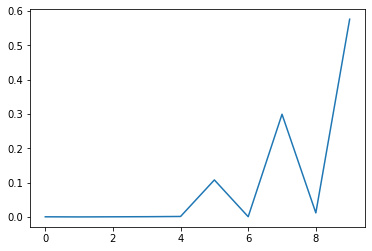

[6.8736321e-04 3.4229486e-04 6.7641627e-04 9.8069350e-04 1.6478114e-03
 1.0795037e-01 9.3943701e-04 2.9914200e-01 1.2075740e-02 5.7555783e-01]


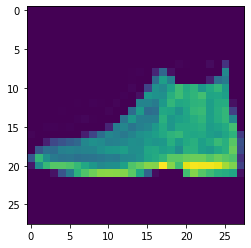

In [44]:
plt.plot(y_pred[0][:])
plt.show()
print(y_pred[0][:])
plt.imshow(test_images[0][:,:,0])
plt.show()

In [46]:
# загружаем данные
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# нормализация данных [0, 1]
train_images /= 255 
test_images /= 255 

# трансформация лейблов в one-hot encoding
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10) 

# изменение размерности массива в 4D массив
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

# инициализация пустой модели
model_1 = Sequential()

# первый сверточный слой
model_1.add(layers.Conv2D(12, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model_1.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model_1.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model_1.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model_1.add(layers.Conv2D(240, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_1.add(layers.Flatten())

# шестой полносвязный слой
model_1.add(layers.Dense(168, activation='tanh'))

# выходной слой с функцией активации softmax
model_1.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model_1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model_1.fit(x=train_images,y=train_labels, epochs=5, batch_size=254, validation_data=(test_images, test_labels), verbose=1)

test_score = model_1.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
237/237 [==============================] - 142s 597ms/step - loss: 1.5551 - accuracy: 0.4720 - val_loss: 0.7929 - val_accuracy: 0.6979
Epoch 2/5
237/237 [==============================] - 129s 545ms/step - loss: 0.6911 - accuracy: 0.7417 - val_loss: 0.6302 - val_accuracy: 0.7608
Epoch 3/5
237/237 [==============================] - 139s 588ms/step - loss: 0.5943 - accuracy: 0.7809 - val_loss: 0.6110 - val_accuracy: 0.7708
Epoch 4/5
237/237 [==============================] - 135s 571ms/step - loss: 0.5486 - accuracy: 0.7961 - val_loss: 0.5680 - val_accuracy: 0.7920
Epoch 5/5
313/313 [==============================] - 7s 21ms/step - loss: 0.5372 - accuracy: 0.8011
Test loss 0.5372, accuracy 80.11%


In [53]:
# загружаем данные
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# нормализация данных [0, 1]
train_images /= 255 
test_images /= 255 

# трансформация лейблов в one-hot encoding
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10) 

# изменение размерности массива в 4D массив
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

# инициализация пустой модели
model_2 = Sequential()

# первый сверточный слой
model_2.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# третий сверточный слой
model_2.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='same'))

# четвертый пуллинговый слой
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# пятый сверточный слой
model_2.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='same'))

# шестой пуллинговый слой
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# седьмой сверточный слой
model_2.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='same'))

# восьмой пуллинговый слой
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# девятый сверточный слой
model_2.add(layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='same'))

# десятый пуллинговый слой
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# одиннадцатый сверточный слой
model_2.add(layers.Conv2D(254, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_2.add(layers.Flatten())

# шестой полносвязный слой
model_2.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model_2.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model_2.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model_2.fit(x=train_images,y=train_labels, epochs=5, batch_size=254, validation_data=(test_images, test_labels), verbose=1)

test_score = model_2.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
237/237 [==============================] - 100s 421ms/step - loss: 2.1754 - accuracy: 0.2343 - val_loss: 1.2825 - val_accuracy: 0.5941
Epoch 2/5
237/237 [==============================] - 98s 413ms/step - loss: 1.1952 - accuracy: 0.6032 - val_loss: 1.0446 - val_accuracy: 0.6156
Epoch 3/5
237/237 [==============================] - 102s 432ms/step - loss: 1.0127 - accuracy: 0.6315 - val_loss: 0.9673 - val_accuracy: 0.6383
Epoch 4/5
237/237 [==============================] - 99s 417ms/step - loss: 0.9558 - accuracy: 0.6395 - val_loss: 0.9253 - val_accuracy: 0.6544
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 0.9002 - accuracy: 0.6677
Test loss 0.9002, accuracy 66.77%


In [59]:
# загружаем данные
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# нормализация данных [0, 1]
train_images /= 255 
test_images /= 255 

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# трансформация лейблов в one-hot encoding
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10) 

model_3 = Sequential(name='model_3')
model_3.add(Dense(256, activation='relu', input_shape=(784,)))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

hist = model_3.fit(x=train_images,y=train_labels, epochs=5, batch_size=254, validation_data=(test_images, test_labels), verbose=1)

test_score = model_3.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
237/237 [==============================] - 4s 13ms/step - loss: 0.9358 - accuracy: 0.6616 - val_loss: 0.4668 - val_accuracy: 0.8383
Epoch 2/5
237/237 [==============================] - 3s 11ms/step - loss: 0.4231 - accuracy: 0.8492 - val_loss: 0.4565 - val_accuracy: 0.8294
Epoch 3/5
237/237 [==============================] - 3s 11ms/step - loss: 0.3590 - accuracy: 0.8704 - val_loss: 0.3960 - val_accuracy: 0.8560
Epoch 4/5
237/237 [==============================] - ETA: 0s - loss: 0.3249 - accuracy: 0.88 - 3s 11ms/step - loss: 0.3248 - accuracy: 0.8800 - val_loss: 0.3696 - val_accuracy: 0.8660
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8720
Test loss 0.3637, accuracy 87.20%


model         Test loss 0.5591, accuracy 79.26%
model_1       Test loss 0.5372, accuracy 80.11%  кол-во ядер на всех слоях увеличено в 2 раза
model_2       Test loss 0.9002, accuracy 66.77%  + по 3 сверточных и пуллинговых слоев
model_3       Test loss 0.3637, accuracy 87.20%  полносвязная сеть 

In [2]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [6]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [7]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

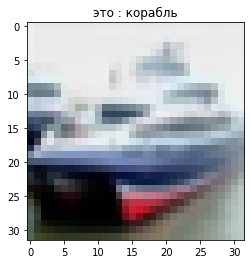

In [8]:
N = 1

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [9]:
x_train.shape[1:]

(32, 32, 3)

In [10]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))

# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
197/197 [==============================] - 63s 312ms/step - loss: 2.2248 - accuracy: 0.1767 - val_loss: 1.9603 - val_accuracy: 0.3054
Epoch 2/5
197/197 [==============================] - 62s 317ms/step - loss: 1.9407 - accuracy: 0.3109 - val_loss: 1.8488 - val_accuracy: 0.3502
Epoch 3/5
197/197 [==============================] - 61s 311ms/step - loss: 1.8340 - accuracy: 0.3577 - val_loss: 1.7913 - val_accuracy: 0.3699
Epoch 4/5
197/197 [==============================] - 65s 332ms/step - loss: 1.7901 - accuracy: 0.3729 - val_loss: 1.7504 - val_accuracy: 0.3914
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 1.7199 - accuracy: 0.3992
Test model_5 1.7199, accuracy 39.92%


In [11]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# четвертый пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(84, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
197/197 [==============================] - 63s 318ms/step - loss: 2.2904 - accuracy: 0.1087 - val_loss: 2.1872 - val_accuracy: 0.2065
Epoch 2/5
197/197 [==============================] - 58s 296ms/step - loss: 2.1377 - accuracy: 0.2172 - val_loss: 2.0373 - val_accuracy: 0.2636
Epoch 3/5
197/197 [==============================] - 58s 296ms/step - loss: 1.9809 - accuracy: 0.2920 - val_loss: 1.8969 - val_accuracy: 0.3264
Epoch 4/5
197/197 [==============================] - 67s 338ms/step - loss: 1.8660 - accuracy: 0.3395 - val_loss: 1.8244 - val_accuracy: 0.3412
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 1.6900 - accuracy: 0.4035
Test model_5 1.6900, accuracy 40.35%


In [12]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# четвертый пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(84, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))


Epoch 1/5
197/197 [==============================] - 75s 379ms/step - loss: 1.8796 - accuracy: 0.3155 - val_loss: 1.4384 - val_accuracy: 0.4858
Epoch 2/5
197/197 [==============================] - 61s 310ms/step - loss: 1.3875 - accuracy: 0.5031 - val_loss: 1.2669 - val_accuracy: 0.5536
Epoch 3/5
197/197 [==============================] - 60s 307ms/step - loss: 1.2046 - accuracy: 0.5760 - val_loss: 1.1433 - val_accuracy: 0.5951
Epoch 4/5
197/197 [==============================] - 61s 308ms/step - loss: 1.0805 - accuracy: 0.6239 - val_loss: 1.1489 - val_accuracy: 0.5974
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 1.0412 - accuracy: 0.6378
Test model_5 1.0412, accuracy 63.78%


In [13]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# четвертый пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(84, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='nadam', metrics=["accuracy"])

hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
197/197 [==============================] - 58s 291ms/step - loss: 1.9882 - accuracy: 0.2756 - val_loss: 1.5016 - val_accuracy: 0.4596
Epoch 2/5
197/197 [==============================] - 63s 321ms/step - loss: 1.4574 - accuracy: 0.4822 - val_loss: 1.3621 - val_accuracy: 0.5144
Epoch 3/5
197/197 [==============================] - 61s 309ms/step - loss: 1.2726 - accuracy: 0.5549 - val_loss: 1.2097 - val_accuracy: 0.5741
Epoch 4/5
197/197 [==============================] - 62s 315ms/step - loss: 1.1371 - accuracy: 0.5999 - val_loss: 1.1967 - val_accuracy: 0.5846
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 1.1156 - accuracy: 0.6090
Test model_5 1.1156, accuracy 60.90%


In [14]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# третий сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
model_5.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(84, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
197/197 [==============================] - 126s 639ms/step - loss: 1.8660 - accuracy: 0.3275 - val_loss: 1.3594 - val_accuracy: 0.5117
Epoch 2/5
197/197 [==============================] - 115s 583ms/step - loss: 1.2958 - accuracy: 0.5446 - val_loss: 1.1910 - val_accuracy: 0.5742
Epoch 3/5
197/197 [==============================] - 106s 539ms/step - loss: 1.0941 - accuracy: 0.6167 - val_loss: 1.0965 - val_accuracy: 0.6175
Epoch 4/5
197/197 [==============================] - 107s 541ms/step - loss: 0.9687 - accuracy: 0.6629 - val_loss: 1.0322 - val_accuracy: 0.6406
Epoch 5/5
313/313 [==============================] - 8s 27ms/step - loss: 1.0116 - accuracy: 0.6569
Test model_5 1.0116, accuracy 65.69%


In [15]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# третий сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(84, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
197/197 [==============================] - 118s 598ms/step - loss: 1.8087 - accuracy: 0.3355 - val_loss: 1.2954 - val_accuracy: 0.5422
Epoch 2/5
197/197 [==============================] - 109s 554ms/step - loss: 1.2406 - accuracy: 0.5593 - val_loss: 1.0963 - val_accuracy: 0.6134
Epoch 3/5
197/197 [==============================] - 111s 561ms/step - loss: 1.0496 - accuracy: 0.6303 - val_loss: 1.1070 - val_accuracy: 0.6068
Epoch 4/5
197/197 [==============================] - 109s 555ms/step - loss: 0.9261 - accuracy: 0.6770 - val_loss: 0.9695 - val_accuracy: 0.6621
Epoch 5/5
313/313 [==============================] - 9s 29ms/step - loss: 0.9351 - accuracy: 0.6789
Test model_5 0.9351, accuracy 67.89%


In [16]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(6, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# третий сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(120, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(84, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
197/197 [==============================] - 64s 321ms/step - loss: 1.9352 - accuracy: 0.3030 - val_loss: 1.3103 - val_accuracy: 0.5352
Epoch 2/5
197/197 [==============================] - 60s 303ms/step - loss: 1.2432 - accuracy: 0.5638 - val_loss: 1.1430 - val_accuracy: 0.5930
Epoch 3/5
197/197 [==============================] - 59s 301ms/step - loss: 1.0982 - accuracy: 0.6181 - val_loss: 1.0991 - val_accuracy: 0.6154
Epoch 4/5
197/197 [==============================] - 60s 306ms/step - loss: 0.9761 - accuracy: 0.6638 - val_loss: 1.0467 - val_accuracy: 0.6273
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 0.9779 - accuracy: 0.6553
Test model_5 0.9779, accuracy 65.53%


In [17]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# третий сверточный слой
model_5.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(128, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
197/197 [==============================] - 291s 1s/step - loss: 1.9393 - accuracy: 0.2936 - val_loss: 1.3199 - val_accuracy: 0.5234
Epoch 2/5
197/197 [==============================] - 295s 1s/step - loss: 1.2343 - accuracy: 0.5595 - val_loss: 1.0933 - val_accuracy: 0.6125
Epoch 3/5
197/197 [==============================] - 313s 2s/step - loss: 1.0087 - accuracy: 0.6448 - val_loss: 0.9867 - val_accuracy: 0.6476
Epoch 4/5
197/197 [==============================] - 314s 2s/step - loss: 0.8751 - accuracy: 0.6929 - val_loss: 0.9263 - val_accuracy: 0.6733
Epoch 5/5
313/313 [==============================] - 19s 59ms/step - loss: 0.9085 - accuracy: 0.6890
Test model_5 0.9085, accuracy 68.90%


In [18]:
# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# третий сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# пятый сверточный слой
model_5.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))



# шестой пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# седьмой сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# восьмой пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# девятый сверточный слой
model_5.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))




# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# десятый полносвязный слой
model_5.add(layers.Dense(84, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)


test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
197/197 [==============================] - 272s 1s/step - loss: 1.9556 - accuracy: 0.2758 - val_loss: 1.4349 - val_accuracy: 0.4846
Epoch 2/5
197/197 [==============================] - 266s 1s/step - loss: 1.3301 - accuracy: 0.5224 - val_loss: 1.2419 - val_accuracy: 0.5533
Epoch 3/5
197/197 [==============================] - 282s 1s/step - loss: 1.1633 - accuracy: 0.5826 - val_loss: 1.1569 - val_accuracy: 0.5802
Epoch 4/5
197/197 [==============================] - 281s 1s/step - loss: 1.0431 - accuracy: 0.6301 - val_loss: 1.0757 - val_accuracy: 0.6204
Epoch 5/5
313/313 [==============================] - 13s 40ms/step - loss: 1.0572 - accuracy: 0.6245
Test model_5 1.0572, accuracy 62.45%


In [14]:

model_5 = Sequential(name='model_5')
model_5.add(layers.Flatten())
model_5.add(Dense(256, activation='relu', input_shape=(1024,)))
model_5.add(Dense(256, activation='relu'))
model_5.add(Dense(128, activation='relu'))
model_5.add(Dense(128, activation='relu'))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(10, activation='softmax'))

model_5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

hist = model_5.fit(x=x_train,y=y_train, epochs=15, batch_size=254, validation_data=(x_test, y_test), verbose=1)

test_score = model_5.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/15
197/197 [==============================] - 5s 23ms/step - loss: 2.0934 - accuracy: 0.2087 - val_loss: 1.7753 - val_accuracy: 0.3624
Epoch 2/15
197/197 [==============================] - 4s 23ms/step - loss: 1.7688 - accuracy: 0.3591 - val_loss: 1.7449 - val_accuracy: 0.3727
Epoch 3/15
197/197 [==============================] - 5s 23ms/step - loss: 1.6841 - accuracy: 0.3950 - val_loss: 1.6033 - val_accuracy: 0.4238
Epoch 4/15
197/197 [==============================] - 5s 24ms/step - loss: 1.5984 - accuracy: 0.4261 - val_loss: 1.5728 - val_accuracy: 0.4269
Epoch 5/15
197/197 [==============================] - 5s 24ms/step - loss: 1.5529 - accuracy: 0.4426 - val_loss: 1.5527 - val_accuracy: 0.4413
Epoch 6/15
197/197 [==============================] - 4s 23ms/step - loss: 1.5091 - accuracy: 0.4570 - val_loss: 1.5592 - val_accuracy: 0.4420
Epoch 7/15
197/197 [==============================] - 5s 27ms/step - loss: 1.4712 - accuracy: 0.4718 - val_loss: 1.4941 - val_accuracy: 0.4629

In [37]:
#Препроцессинг и data augmentation в реальном времени:
# запуск data augmentation через fit
#datagen.fit(x_train)
# запуск data augmentation через fit_generator
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
#                        validation_data=(x_test, y_test), workers=4)
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0., 
    zoom_range=0., 
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

# инициализация пустой модели
model_5 = Sequential()

# первый сверточный слой
model_5.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=x_train.shape[1:], padding="same"))

# второй пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# третий сверточный слой
model_5.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
model_5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# пятый полносвязный слой
model_5.add(layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_5.add(layers.Flatten())

# шестой полносвязный слой
model_5.add(layers.Dense(128, activation='relu'))

# выходной слой с функцией активации softmax
model_5.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

#hist = model_5.fit(x=x_train,y=y_train, epochs=5, batch_size=254, validation_data=(x_test, y_test), verbose=1)
hist = model_5.fit(datagen.flow(x_train, y_train, batch_size=256), epochs=5,
                        validation_data=(x_test, y_test), workers=4)

test_score = model_5.evaluate(x_test, y_test)
print("Test model_5 {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
196/196 [==============================] - 348s 2s/step - loss: 1.8587 - accuracy: 0.3200 - val_loss: 1.2771 - val_accuracy: 0.5445
Epoch 2/5
196/196 [==============================] - 319s 2s/step - loss: 1.2552 - accuracy: 0.5526 - val_loss: 1.0489 - val_accuracy: 0.6336
Epoch 3/5
196/196 [==============================] - 316s 2s/step - loss: 1.0635 - accuracy: 0.6259 - val_loss: 0.9274 - val_accuracy: 0.6751
Epoch 4/5
196/196 [==============================] - 305s 2s/step - loss: 0.9467 - accuracy: 0.6674 - val_loss: 0.9083 - val_accuracy: 0.6828
Epoch 5/5
313/313 [==============================] - 18s 58ms/step - loss: 0.8390 - accuracy: 0.7031
Test model_5 0.8390, accuracy 70.31%


стартовый вариант: слоев-7, нейронов-6,16,120,84, kernel_size-(5, 5), strides=(1, 1),
                   activation='tanh', padding="valid", optimizer='SGD', epochs=5

         + изменение оставили 
         - изменение отменили

старт                  Test model_5 1.7199, accuracy 39.92% 
+'relu'          +     Test model_5 1.6900, accuracy 40.35%
+'adam'          +     Test model_5 1.0412, accuracy 63.78%
+'nadam'         -     Test model_5 1.1156, accuracy 60.90%  отмена в связи с неэффективностью
+'same'          +     Test model_5 1.0116, accuracy 65.69%
+MaxPooling      +     Test model_5 0.9351, accuracy 67.89%
+kernel(3, 3)    -     Test model_5 0.9779, accuracy 65.53%  отмена в связи с неэффективностью
+кол-во ядер     -     Test model_5 0.9085, accuracy 68.90%  отменила изменение для сравнения с предыдущей моделью
+кол-во слоев    -     Test model_5 1.0572, accuracy 62.45%  отмена в связи с неэффективностью
полнометражная   -     Test    loss 1.4010, accuracy 49.73%  отмена в связи с неэффективностью даже при 15 эпохах
+аугментация     +     Test model_5 0.8390, accuracy 70.31%

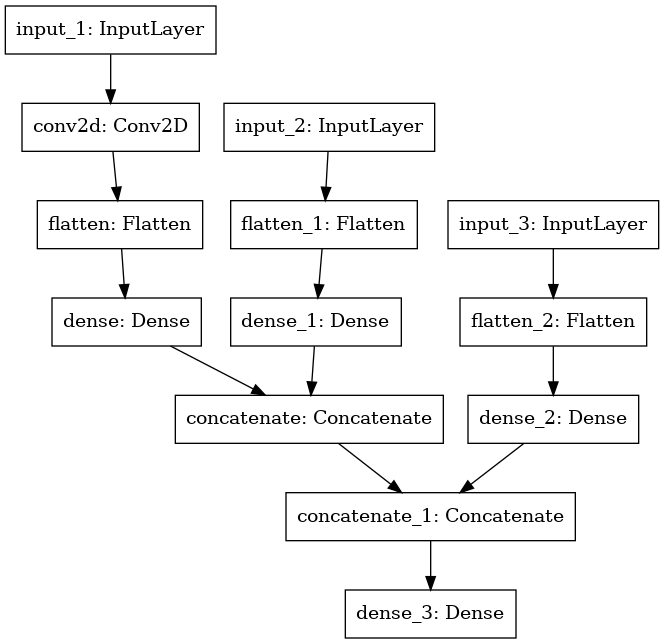

In [10]:
first_input = Input(shape=(32,32,3))
x11= Conv2D(16,5,activation='relu')(first_input)
x11= Flatten()(x11)
first_dense = Dense(1, )(x11)

second_input = Input(shape=(32,32,3))
x22= Flatten()(second_input)
second_dense = Dense(1, )(x22)

merge_one = Concatenate()([first_dense, second_dense])

third_input = Input(shape=(32,32,3))
x33= Flatten()(third_input)
x33 = Dense(1, )(x33)
merge_two = Concatenate(axis=1)([merge_one, x33])
merge_two=Dense(10, activation='softmax')(merge_two)


model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model_stek,'model_stek.png')

In [11]:
hist = model_stek.fit([x_train,x_train,x_train],y_train, epochs = 5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 18s 14ms/step - loss: 3.6212 - accuracy: 0.1930 - val_loss: 1.9561 - val_accuracy: 0.2781
Epoch 2/5
1250/1250 [==============================] - 17s 14ms/step - loss: 1.9306 - accuracy: 0.2890 - val_loss: 1.8809 - val_accuracy: 0.3114
Epoch 3/5
1250/1250 [==============================] - 17s 14ms/step - loss: 1.8784 - accuracy: 0.3017 - val_loss: 1.8986 - val_accuracy: 0.2937
Epoch 4/5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.8510 - accuracy: 0.3072 - val_loss: 1.8649 - val_accuracy: 0.3025
Epoch 5/5
1250/1250 [==============================] - 20s 16ms/step - loss: 1.8382 - accuracy: 0.3092 - val_loss: 1.8456 - val_accuracy: 0.3117


In [14]:
test_score = model_stek.evaluate([x_test,x_test,x_test], y_test)
print("Test model_stek {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 2s 5ms/step - loss: 1.8254 - accuracy: 0.3174
Test model_stek 1.8254, accuracy 31.74%


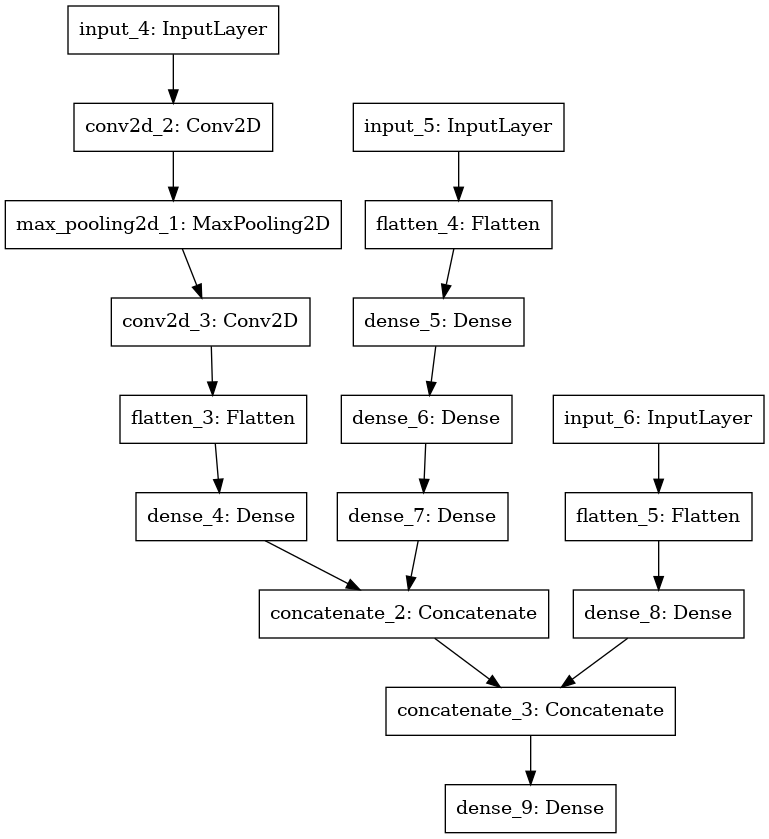

In [13]:
first_input = Input(shape=(32,32,3))
x11= Conv2D(16,5,activation='relu')(first_input)
x22= MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(x11)
x33= Conv2D(32,5,activation='relu')(x22)
x33= Flatten()(x33)
first_dense = Dense(1, )(x33)

second_input = Input(shape=(32,32,3))
x55= Flatten()(second_input)
x66 = Dense(128, )(x55)
x77 = Dense(64, )(x66)
second_dense = Dense(1, )(x77)

merge_one = Concatenate()([first_dense, second_dense])

third_input = Input(shape=(32,32,3))
x99= Flatten()(third_input)
x99 = Dense(1, )(x99)
merge_two = Concatenate(axis=1)([merge_one, x99])
merge_two=Dense(10, activation='softmax')(merge_two)


model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model_stek,'model_stek.png')

In [14]:
hist = model_stek.fit([x_train,x_train,x_train],y_train, epochs = 1, validation_split=0.2)

1250/1250 [==============================] - 75s 59ms/step - loss: 2.3727 - accuracy: 0.1796 - val_loss: 1.8678 - val_accuracy: 0.3199


In [15]:
test_score = model_stek.evaluate([x_test,x_test,x_test], y_test)
print("Test model_stek {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 4s 13ms/step - loss: 1.8521 - accuracy: 0.3221
Test model_stek 1.8521, accuracy 32.21%
